# **🏠Predicting House Prices using Ridge and Lasso Regression**
In this Project we Predict house prices using Ridge and Lasso regression, and compare them to standard Linear Regression.

##📦 Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')
sns.set(style="whitegrid")


##📥 Step 2: Load Dataset

In [2]:
# Using Seaborn's diamonds dataset as a proxy for house prices
df = sns.load_dataset('diamonds')
df = df.select_dtypes(include=[np.number])
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


##🔍 Step 3: Explore Dataset

In [3]:
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 2.9 MB


##📊 Step 4: Exploratory Data Analysis (EDA)

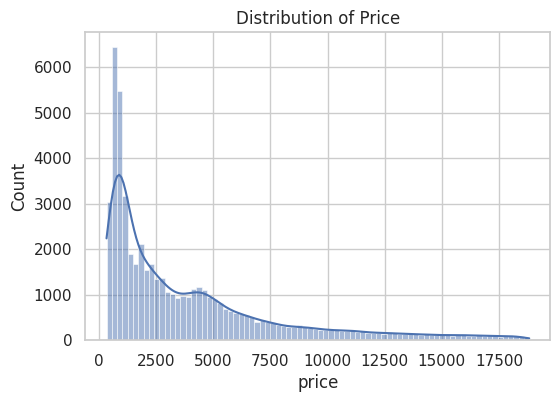

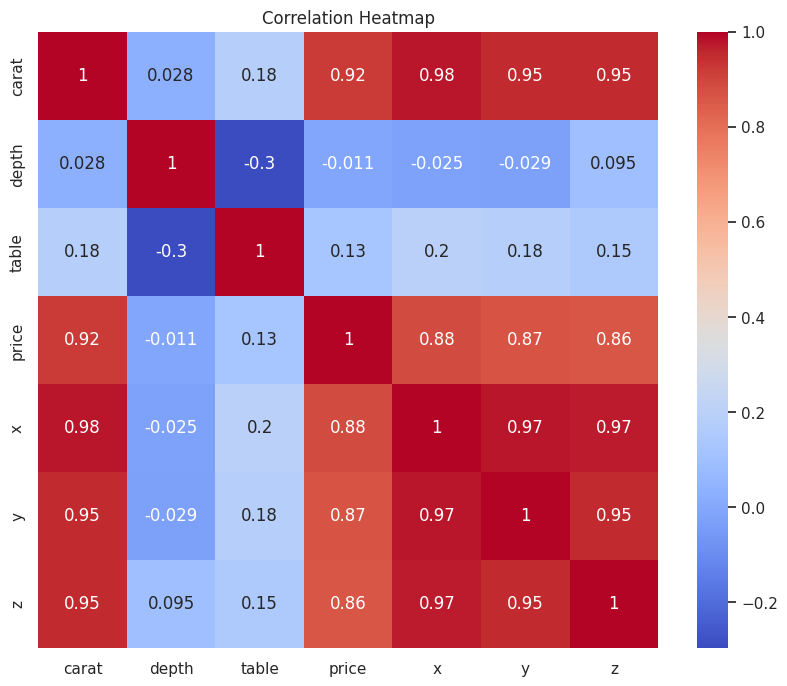

In [4]:
plt.figure(figsize=(6,4))
sns.histplot(df['price'], kde=True)
plt.title('Distribution of Price')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##🧼 Step 5: Preprocessing

In [5]:
X = df.drop('price', axis=1)
y = df['price']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

##🧪 Step 6: Train-Test Split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##🧠 Step 7: Train the Model

In [7]:
lr = LinearRegression()
lr.fit(X_train, y_train)

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

##✅ Step 8: Evaluate the Model

In [8]:
def evaluate_model(name, model):
    preds = model.predict(X_test)
    print(f"{name}")
    print(f"MAE: {mean_absolute_error(y_test, preds):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, preds)):.2f}")
    print(f"R²: {r2_score(y_test, preds):.4f}")
    print("-" * 30)

evaluate_model("Linear Regression", lr)
evaluate_model("Ridge Regression", ridge)
evaluate_model("Lasso Regression", lasso)


Linear Regression
MAE: 888.48
RMSE: 1497.39
R²: 0.8590
------------------------------
Ridge Regression
MAE: 888.64
RMSE: 1497.39
R²: 0.8590
------------------------------
Lasso Regression
MAE: 888.68
RMSE: 1497.41
R²: 0.8590
------------------------------


##🔍 Step 9: Model Interpretability (Optional)

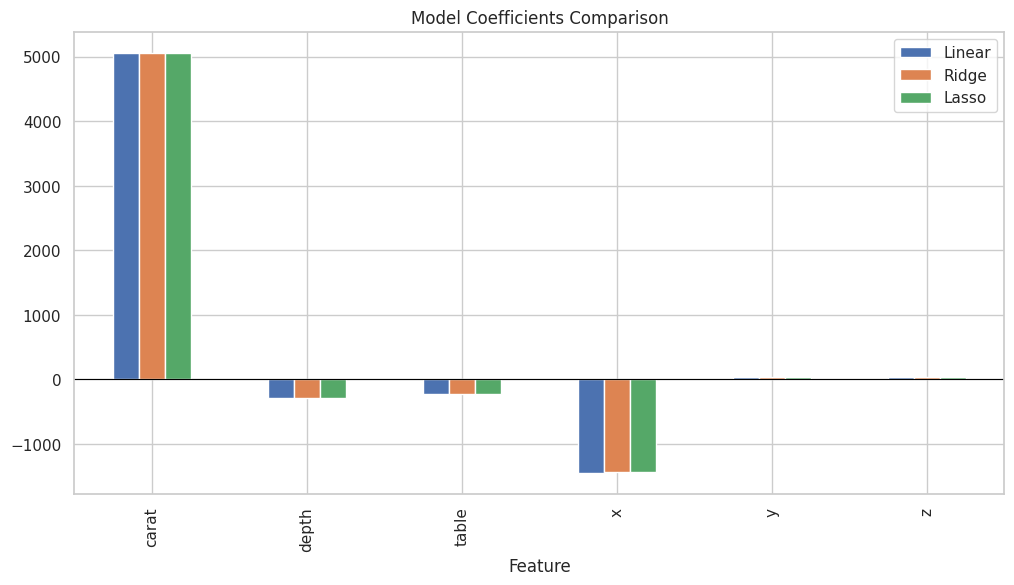

In [9]:
coef_df = pd.DataFrame({
    'Feature': df.drop('price', axis=1).columns,
    'Linear': lr.coef_,
    'Ridge': ridge.coef_,
    'Lasso': lasso.coef_
})
coef_df.set_index('Feature').plot(kind='bar', figsize=(12,6))
plt.title("Model Coefficients Comparison")
plt.axhline(0, color='black', linewidth=0.8)
plt.show()


##💾 Step 10: Save the Mode

In [10]:
import joblib
joblib.dump(lasso, "lasso_model.pkl")

['lasso_model.pkl']

##🔮 Step 11: Predict on New or Unseen Data

In [11]:
sample = X_test[0].reshape(1, -1)
prediction = lasso.predict(sample)
print(f"Predicted Price: ${prediction[0]:,.2f}")

Predicted Price: $199.19


##🧠 Final Summary
- Learned how to apply Ridge and Lasso regression for regularization  
- Compared them with standard Linear Regression  
- Visualized the impact of regularization on model coefficients  
- Ridge retained all features with reduced magnitude  
- Lasso performed feature selection by zeroing out some coefficients
